# 住宅情報の分析

### エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。\
住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。\
エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

https://en.wikipedia.org/wiki/Ames,_Iowa

## 【問題1】データセットの取得

pd.read_csv()を使用して、変数に格納してください。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。



In [3]:
print("アイオワ州のエイムズにある1460件の住宅について、79項目の説明変数を持つデータセット。")
print("この情報を用いて住宅の最終価格を予想することが目的。")

アイオワ州のエイムズにある1460件の住宅について、79項目の説明変数を持つデータセット。
この情報を用いて住宅の最終価格を予想することが目的。


## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

・各特徴量がどういったものかを見る。（数値データか文字データなど）\
・今回の目的変数はどの列か確認する。\
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [4]:
#各特徴量がどういったものかを見る。（数値データか文字データなど）
display(df.head())
display(df.info())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

In [5]:
#今回の目的変数はどの列か確認する。
print("目的変数は予想したい変数のこと。したがって、Sales Price。")
print("Sales Priceは80列目。")

目的変数は予想したい変数のこと。したがって、Sales Price。
Sales Priceは80列目。


In [6]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる
display(df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。\

・各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。\
このライブラリにより欠損値の有無が可視化できます。

・欠損値が何パーセント含まれるかを確認する。\
・5つ以上欠損値がある特徴量（列）は削除する。\
・5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。

In [33]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


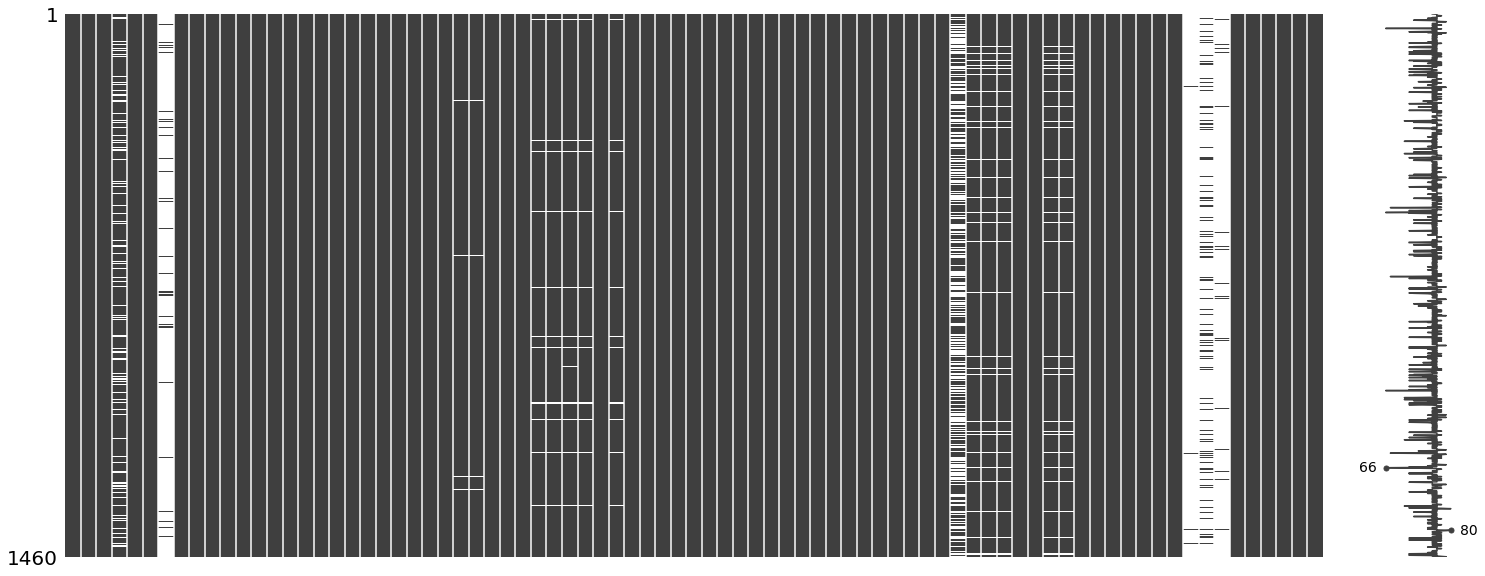

各行について80列中66～80列は埋まっている


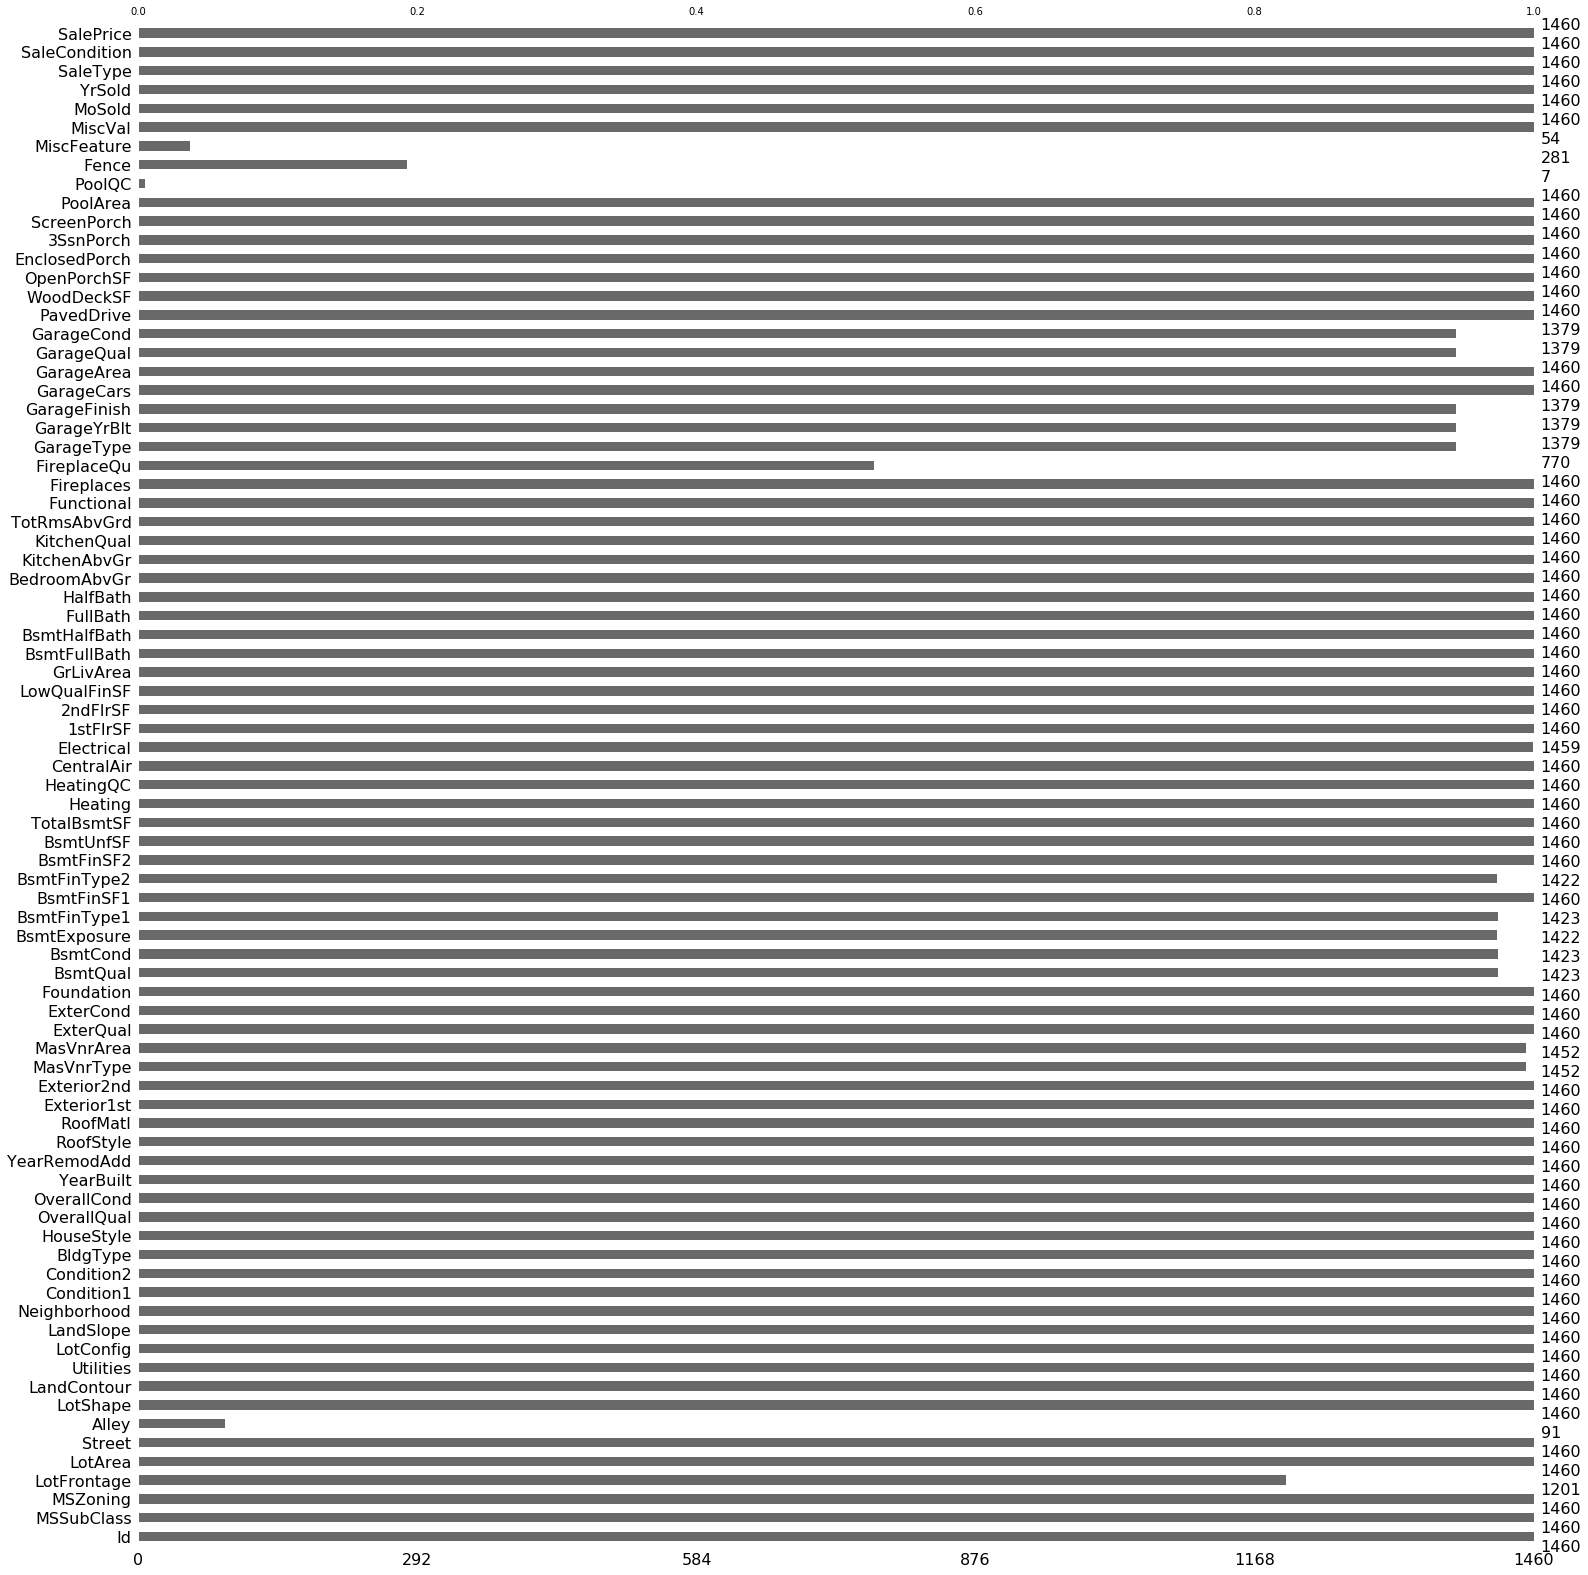

In [10]:
# missingnoをつかって欠損値を可視化。
import missingno as msno
display(msno.matrix(df))
plt.show()
print("各行について80列中66～80列は埋まっている")
display(msno.bar(df))
plt.show()

In [117]:
#.isnull()で、データがない箇所を表示。
display(df.isnull())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [118]:
#各列における欠損値の数を出力
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
display(df.isnull().sum(axis=0))

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [119]:
# 欠損値が何パーセント含まれるかを確認する
pd.options.display.precision = 6
display(df.isnull().mean(axis=0))

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [11]:
# 5つ以上欠損値がある特徴量（列）は削除する。
missing = df.isnull().sum(axis=0) #各列の欠損値を合計
missing5 = missing[missing>=5] #5つ以上欠損値がある列を抽出
df.drop(missing5.index,axis=1, inplace=True) #対象列を削除
display(df)
display(df.isnull().sum(axis=0))

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [12]:
# 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df.dropna(how='any',inplace=True)
display(df)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


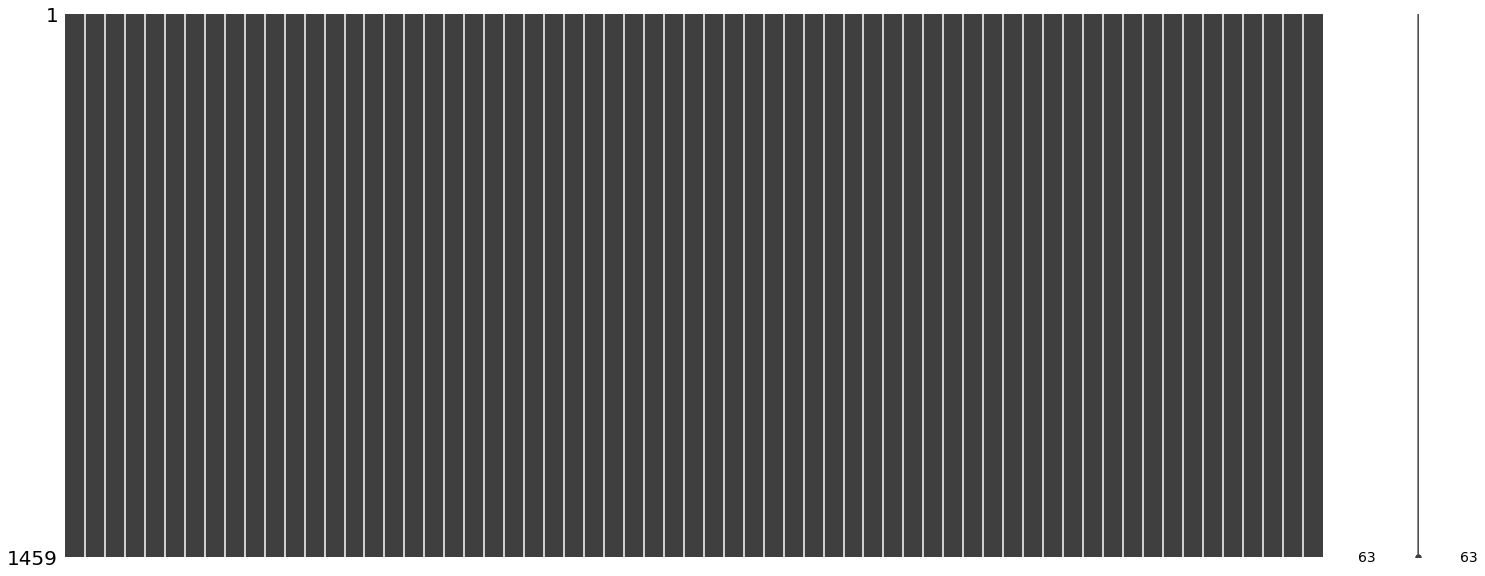

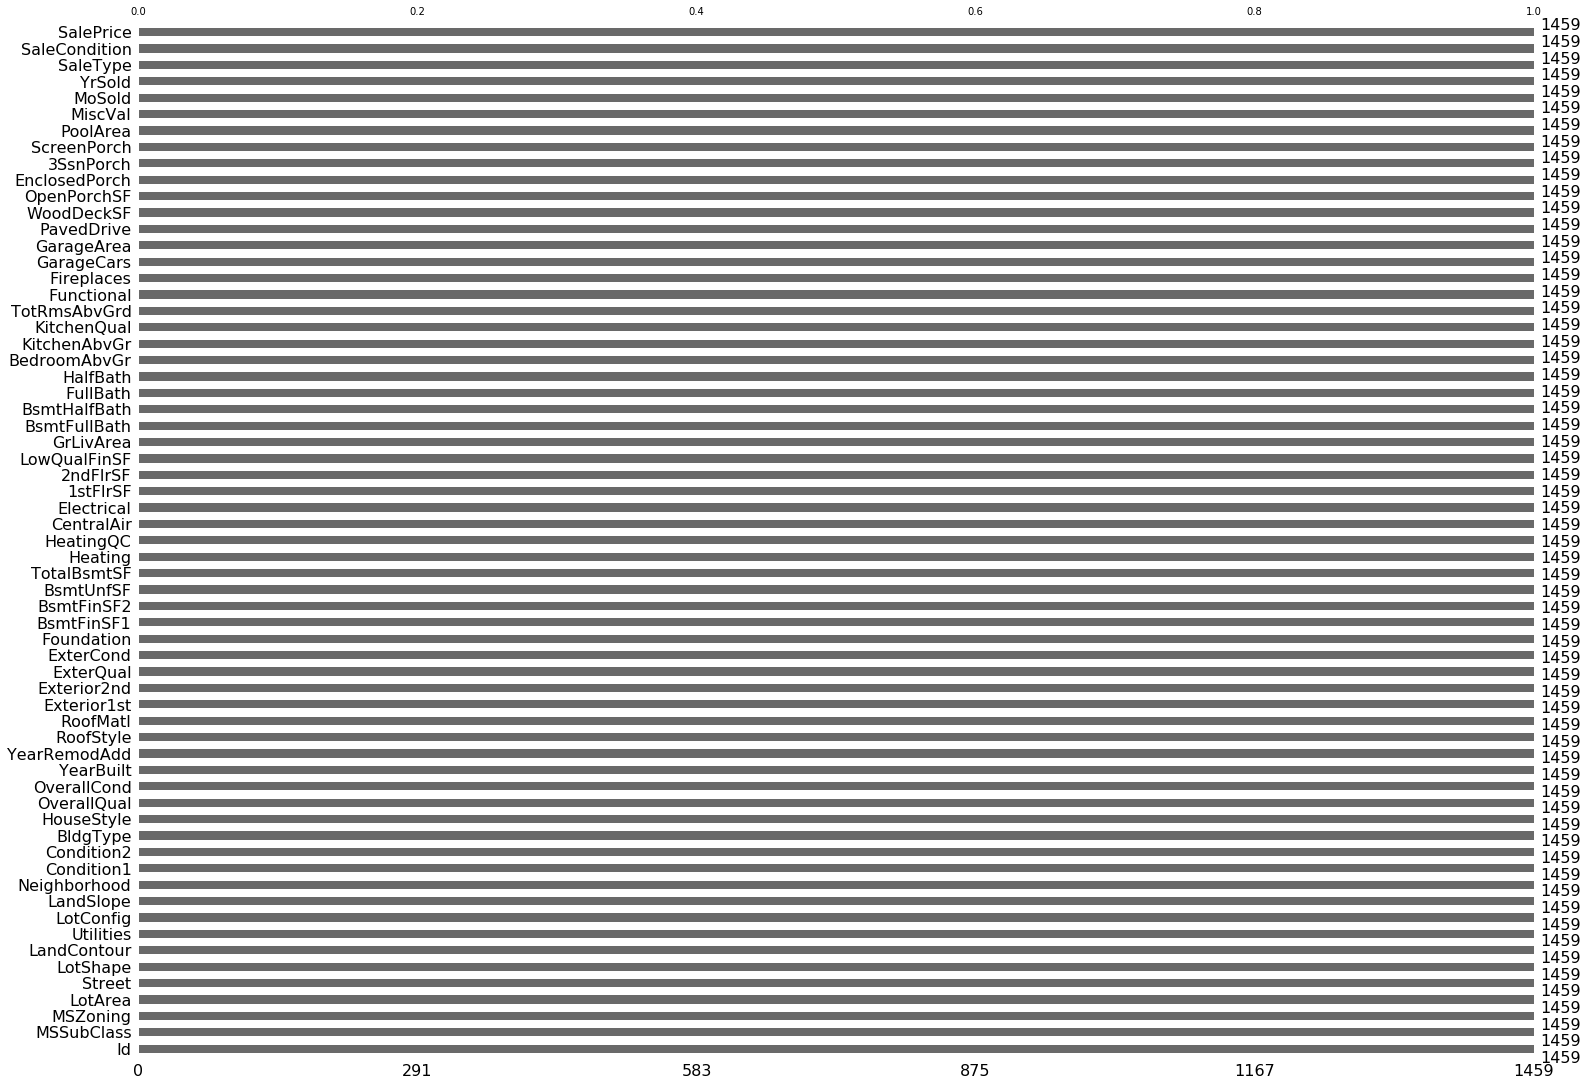

In [13]:
display(msno.matrix(df)) # 欠損値がなくなったことを確認
plt.show()
display(msno.bar(df))
plt.show()

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

・尖度\
・歪度

In [14]:
print("歪度(わいど：Skewness) : ")
print("分布の非対称性を示す指標(データの分布の左右へのゆがみを表す)。値が正であると分布が右に伸びている。逆に負であると左に伸びている。")
print("・分布が左右対称      →（歪度）＝ 0 ")
print("・右にすそが長い分布　→（歪度）>  0 ")
print("・左にすそが長い分布  →（歪度）<  0 ")
print("")

print("尖度(せんど：Kurtosis) :")
print("正規分布を基準とした分布の鋭さの指標(データの分布の尖がり具合を表す)。正規分布の尖度を0と定義する場合と3と定義する場合がある。")
print("基準である正規分布の尖度よりも大きければ分布は尖っており、小さければ緩やかな分布である。")
print("")    


歪度(わいど：Skewness) : 
分布の非対称性を示す指標(データの分布の左右へのゆがみを表す)。値が正であると分布が右に伸びている。逆に負であると左に伸びている。
・分布が左右対称      →（歪度）＝ 0 
・右にすそが長い分布　→（歪度）>  0 
・左にすそが長い分布  →（歪度）<  0 

尖度(せんど：Kurtosis) :
正規分布を基準とした分布の鋭さの指標(データの分布の尖がり具合を表す)。正規分布の尖度を0と定義する場合と3と定義する場合がある。
基準である正規分布の尖度よりも大きければ分布は尖っており、小さければ緩やかな分布である。



In [15]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in c:\users\tatsu\anaconda3\lib\site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


## 【問題6】分布の確認
seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。\
目的変数に対して対数変換を行う。\
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。\
このように加工することで予測時の精度を上げることができます。

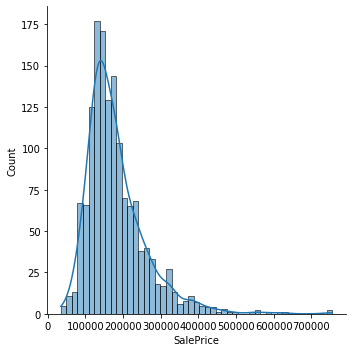

In [16]:
# sns..displotでSalePriceを可視化
display(sns.displot(df['SalePrice'],kde=True))

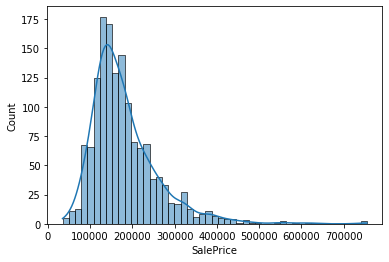

In [17]:
# sns.histplotでSalePriceを可視化
display(sns.histplot(df['SalePrice'],kde=True))

In [23]:
# SalePriceの歪度と尖度
print("SalePriceの歪度と尖度:")
print("歪度 Skewness :", df['SalePrice'].skew())
print("尖度 Kurtosis :", df['SalePrice'].kurt())

SalePriceの歪度と尖度:
歪度 Skewness : 1.8819429948035529
尖度 Kurtosis : 6.529263049673958


目的変数に対して対数変換を行うことで、データの分布が正規分布に近付いた。
機械学習においては、予測しようとしている値が正規分布に従ったほうが精度がよくなるらしい。


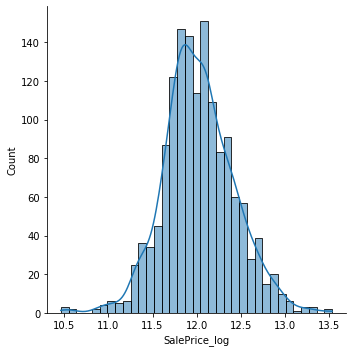

In [24]:
#目的変数に対して対数変換を行う。前後の変化を「正規分布」という言葉を含めて説明。
df['SalePrice_log'] = np.log(df['SalePrice'])
display(sns.displot(df['SalePrice_log'],kde=True))
print("目的変数に対して対数変換を行うことで、データの分布が正規分布に近付いた。")
print("機械学習においては、予測しようとしている値が正規分布に従ったほうが精度がよくなるらしい。")

## 【問題7】相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。\
・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。\
・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。\
・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

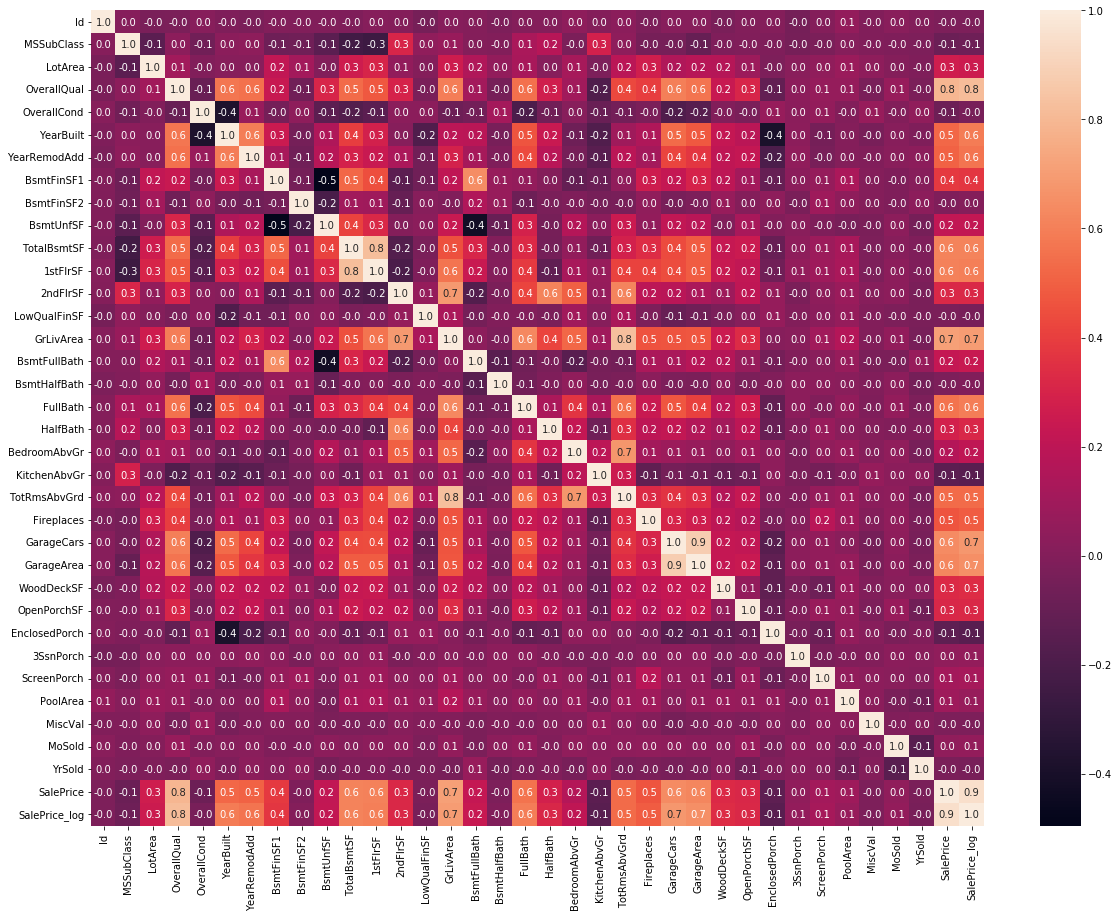

SalesPrice_logと最も相関関係が高いのはOverallQual。


In [25]:
#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
corrmat = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corrmat, annot=True,fmt="1.1f")
plt.show()
print("SalesPrice_logと最も相関関係が高いのはOverallQual。")

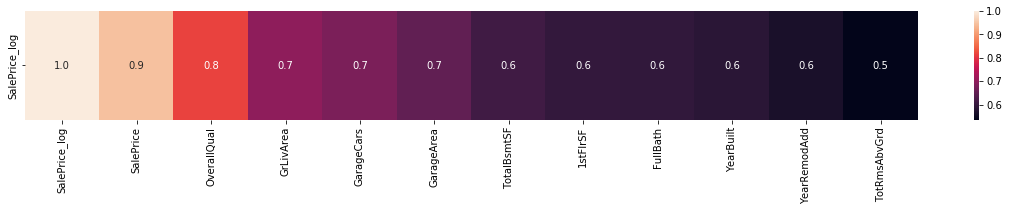

SalePrice_logとの相関関係は、OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd, TotRmsAbvGrdの順に相関が高いことが分かった。


In [50]:
corrmat10 = corrmat.nlargest(12, 'SalePrice_log')
plt.figure(figsize=(20, 2))
sns.heatmap(corrmat10[["SalePrice_log"]].T,annot=True,fmt="1.1f")
plt.show()
print("SalePrice_logとの相関関係は、OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd, TotRmsAbvGrdの順に相関が高いことが分かった。")

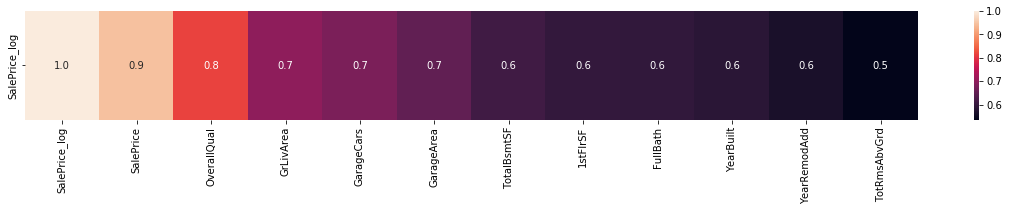

SalePrice_logとの相関関係は、OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd, TotRmsAbvGrdの順に相関が高いことが分かった。


In [26]:
#目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
corrmat10 = corrmat.nlargest(12, 'SalePrice_log')
plt.figure(figsize=(20, 2))
sns.heatmap(corrmat10[["SalePrice_log"]].T,annot=True,fmt="1.1f")
plt.show()
print("SalePrice_logとの相関関係は、OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, YearBuilt, YearRemodAdd, TotRmsAbvGrdの順に相関が高いことが分かった。")

In [27]:
#選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
print("1. OverallQual: 家の全体的な素材や仕上げに対する評価")
print("2. GrLivArea: 地上の居住エリア平方フィート")
print("3. GarageCars: ガレージのサイズ（車の台数）")
print("4. GarageArea: ガレージのサイズ（平方フィート")
print("5. TotalBsmtSF: 地下室面積の合計平方フィート")
print("6. 1stFlrSF: 1階面積の合計平方フィート")
print("7. FullBath: 地上のフルバスルームの数")
print("8. YearBuilt: 建設日")
print("9. YearRemodAdd: リフォーム日（リフォームや増築をしていない場合は建設日と同じ）")
print("10. TotRmsAbvGrd: 階上の総部屋数（バスルームは含まない）")

1. OverallQual: 家の全体的な素材や仕上げに対する評価
2. GrLivArea: 地上の居住エリア平方フィート
3. GarageCars: ガレージのサイズ（車の台数）
4. GarageArea: ガレージのサイズ（平方フィート
5. TotalBsmtSF: 地下室面積の合計平方フィート
6. 1stFlrSF: 1階面積の合計平方フィート
7. FullBath: 地上のフルバスルームの数
8. YearBuilt: 建設日
9. YearRemodAdd: リフォーム日（リフォームや増築をしていない場合は建設日と同じ）
10. TotRmsAbvGrd: 階上の総部屋数（バスルームは含まない）


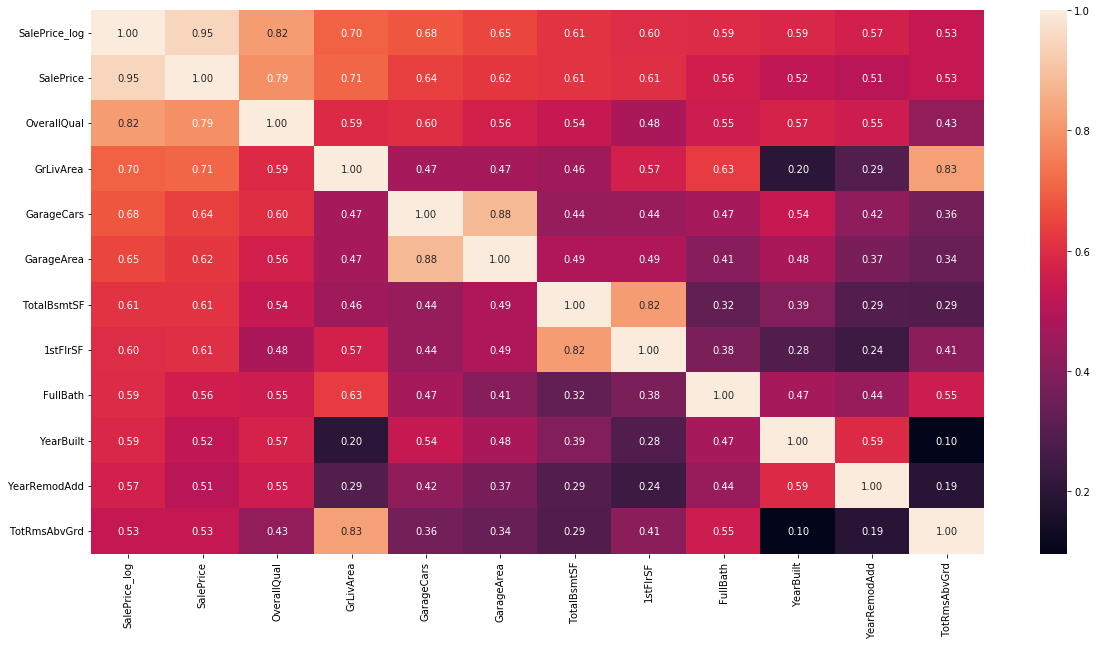

お互いの相関係数が高い組み合わせ3つ
0.88: GarageArea vs GarageCars
ガレージのサイズが大きいほど、ガレージに置ける車の台数は増える。

0.83: TotRmsAbvGrd vs GrLivArea
階上の総部屋数が多いほど、地上の居住エリア平方フィートは大きい。

0.82: 1stFlrSF vs TotalBsmtSF
1階面積の合計平方フィートが大きいほど、地下室面積の合計平方フィートは大きい。



In [28]:
#選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
cols = corrmat.nlargest(12, 'SalePrice_log')['SalePrice_log'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(20, 10))
sns.heatmap(cm,annot=True,fmt="1.2f",yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print("お互いの相関係数が高い組み合わせ3つ")
print("0.88: GarageArea vs GarageCars")
print("ガレージのサイズが大きいほど、ガレージに置ける車の台数は増える。")
print("")
print("0.83: TotRmsAbvGrd vs GrLivArea")
print("階上の総部屋数が多いほど、地上の居住エリア平方フィートは大きい。")
print("")
print("0.82: 1stFlrSF vs TotalBsmtSF")
print("1階面積の合計平方フィートが大きいほど、地下室面積の合計平方フィートは大きい。")
print("")
